In [1]:
#Import necesary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [211]:
#Importing data file:
df = pd.read_csv('student-mat.csv', sep=';') #The original file has ';' as the separator
#Add average score column and round to 1 decimal
df['Avg. Score'] = ((df['G1'] + df['G2'] + df['G3'])/3).round(1)
#Add average score column and round to 1 decimal
dfcount = df
dfcount['Counter']=1

In [217]:
#Pivot
dfcount.pivot_table(index=['school', 'Medu'], aggfunc={'Avg. Score':'mean', 'Counter':'count'})

Avg. Score  Counter
school Medu                     
GP     0      12.533333        3
       1       9.295238       42
       2      10.313542       96
       3      10.342045       88
       4      11.817500      120
MS     1       8.970588       17
       2       8.871429        7
       3      11.272727       11
       4      12.063636       11

In [218]:
dfcount.pivot_table(index=['school', 'Fedu'], aggfunc={'Avg. Score':'mean', 'Counter':'count'})

Avg. Score  Counter
school Fedu                     
GP     0      12.700000        2
       1       9.564179       67
       2      10.778641      103
       3      10.762222       90
       4      11.509195       87
MS     1       8.806667       15
       2      10.233333       12
       3      10.240000       10
       4      12.666667        9

In [3]:
#Create DataFrame with only records from the school GP
dfGP=df[df.school == 'GP']

#Create DataFrame with only records from the school MS
dfMS=df[df.school == 'MS']

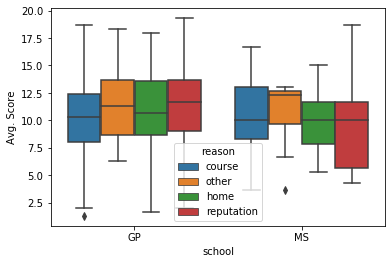

In [208]:
sns.boxplot(x= df['school'], y=df['Avg. Score'], hue=df['reason'])

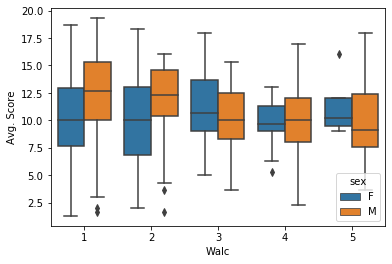

In [210]:
sns.boxplot(x= df['Walc'], y=df['Avg. Score'], hue=df['sex'])

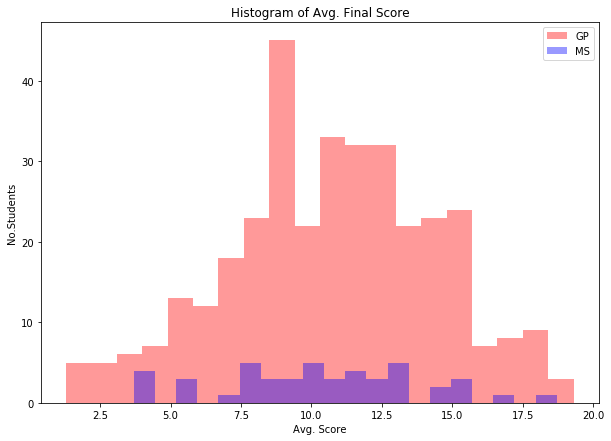

In [50]:
plt.figure(figsize=(10,7)) #Changes the size
sns.distplot(dfGP['Avg. Score'], kde=False, color='red', bins=20, label = 'GP')
sns.distplot(dfMS['Avg. Score'], kde=False, color='blue', bins=20, label = 'MS')
plt.title('Histogram of Avg. Final Score')
plt.xlabel('Avg. Score')
plt.ylabel('No.Students')
plt.legend()

Text(0, 0.5, 'No. Students')

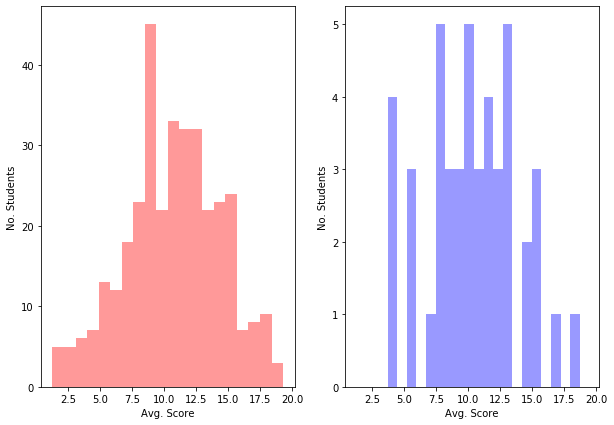

In [46]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(10,7), sharex=True) #Con este parametro se indica el número de filas (2) y el número de gráficas por fila (3)
sns.distplot(dfGP['Avg. Score'], kde=False, color='red', bins=20, label = 'GP', ax=ax1, ).set_ylabel('No. Students')
sns.distplot(dfMS['Avg. Score'], kde=False, color='blue', bins=20, label = 'MS', ax=ax2).set_ylabel('No. Students')

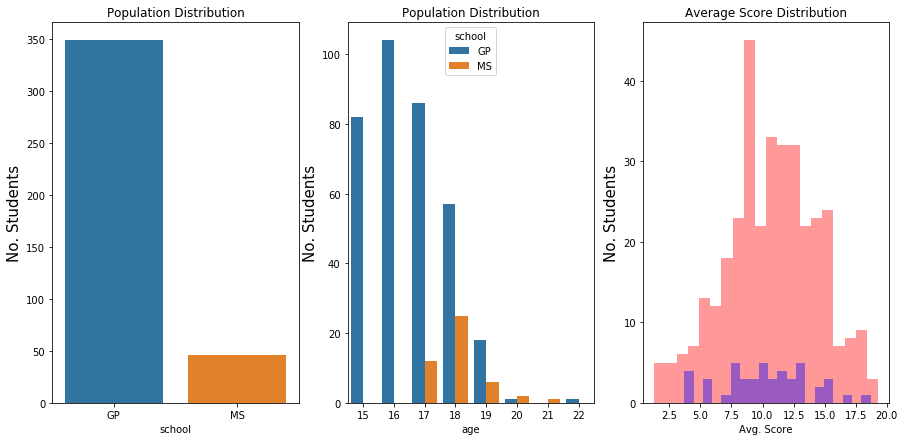

In [260]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,7), sharex=False) #Con sharex se comparte el mismo eje x
sns.countplot(x='school', data=df, ax=ax1).set_ylabel('No. Students', fontsize=15)
sns.countplot(x='age', data=df, hue='school',ax=ax2).set_ylabel('No. Students', fontsize=15)
sns.distplot(dfGP['Avg. Score'], kde=False, color='red', bins=20, label = 'GP', ax=ax3).set_ylabel('No. Students', fontsize=15)
sns.distplot(dfMS['Avg. Score'], kde=False, color='blue', bins=20, label = 'MS', ax=ax3)
ax1.title.set_text('Population Distribution')
ax2.title.set_text('Population Distribution')
ax3.title.set_text('Average Score Distribution')

"sns.countplot(x='school', data=df, ax=ax1).set_ylabel('No. Students', fontsize=15)\n\nsns.countplot(x='age', data=df, hue='school',ax=ax2).set_ylabel('No. Students', fontsize=15)\nsns.distplot(dfGP['Avg. Score'], kde=False, color='red', bins=20, label = 'GP', ax=ax3).set_ylabel('No. Students', fontsize=15)\nsns.distplot(dfMS['Avg. Score'], kde=False, color='blue', bins=20, label = 'MS', ax=ax3)\nax1.title.set_text('Population Distribution')\nax2.title.set_text('Population Distribution')\nax3.title.set_text('Average Score Distribution')"

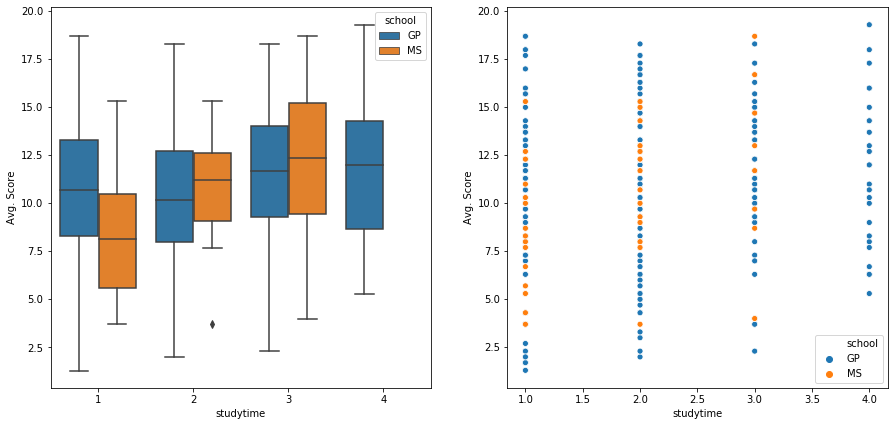

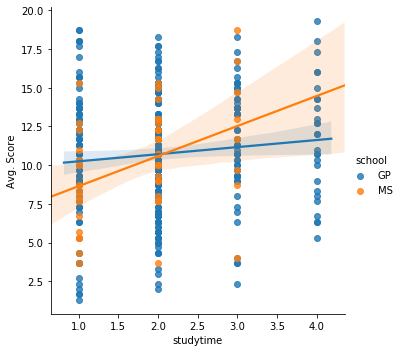

In [283]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(15,7), sharex=False) #Con sharex se comparte el mismo eje x
sns.scatterplot(x='studytime', y='Avg. Score', data = df, hue='school', ax=ax2)
sns.boxplot(x='studytime', y='Avg. Score', data = df, hue='school',ax=ax1)
sns.lmplot(x='studytime', y='Avg. Score', data = df, hue='school')

'''sns.countplot(x='school', data=df, ax=ax1).set_ylabel('No. Students', fontsize=15)

sns.countplot(x='age', data=df, hue='school',ax=ax2).set_ylabel('No. Students', fontsize=15)
sns.distplot(dfGP['Avg. Score'], kde=False, color='red', bins=20, label = 'GP', ax=ax3).set_ylabel('No. Students', fontsize=15)
sns.distplot(dfMS['Avg. Score'], kde=False, color='blue', bins=20, label = 'MS', ax=ax3)
ax1.title.set_text('Population Distribution')
ax2.title.set_text('Population Distribution')
ax3.title.set_text('Average Score Distribution')'''

In [265]:
s_age=df.pivot_table(index=['sex'], aggfunc = {'Dalc':'mean'}, columns='age')
s_age


Dalc                                                       
age        15        16        17        18        19   20   21   22
sex                                                                 
F    1.315789  1.240741  1.241379  1.232558  1.285714  1.0  NaN  NaN
M    1.386364  1.640000  1.925000  1.897436  1.700000  2.5  3.0  5.0

In [79]:
df[['school','age']]

,school,age
0,GP,18
1,GP,17
2,GP,15
3,GP,15
4,GP,16
...,...,...
390,MS,20
391,MS,17
392,MS,21
393,MS,18


Text(0, 0.5, 'Daily Alcohol Consumption')

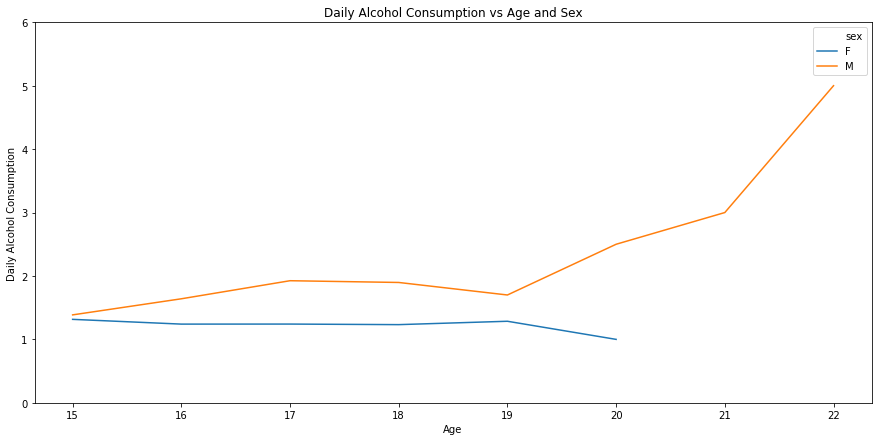

In [52]:
plt.figure(figsize=(15,7)) #Changes the size
sns.lineplot(x='age', y='Dalc', data=df, hue='sex', ci=None) #The x is the index, not the name of the column since this is a pivot
plt.ylim([0,6])
plt.title('Daily Alcohol Consumption vs Age and Sex')
plt.xlabel('Age')
plt.ylabel('Daily Alcohol Consumption')

Text(0, 0.5, 'Daily Alcohol Consumption')

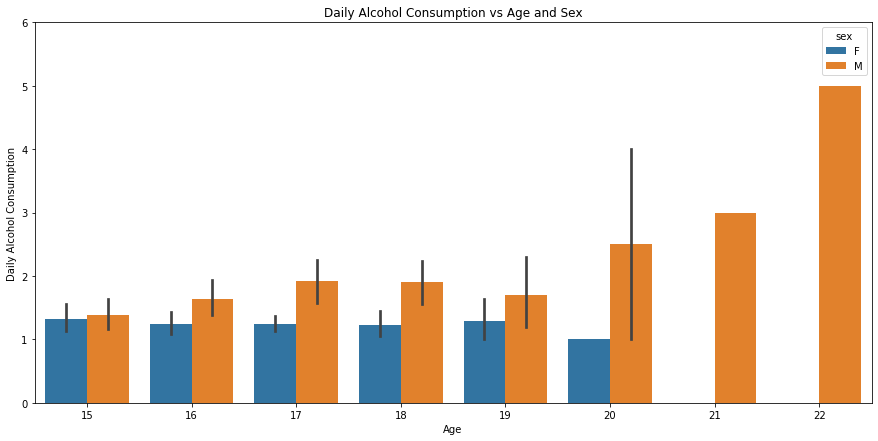

In [263]:
plt.figure(figsize=(15,7)) #Changes the size
sns.barplot(x='age', y='Dalc', data=df, hue='sex') #The x is the index, not the name of the column since this is a pivot
plt.ylim([0,6])
plt.title('Daily Alcohol Consumption vs Age and Sex')
plt.xlabel('Age')
plt.ylabel('Daily Alcohol Consumption')

Text(0, 0.5, 'Consumo Alcohol en fin de Semana')

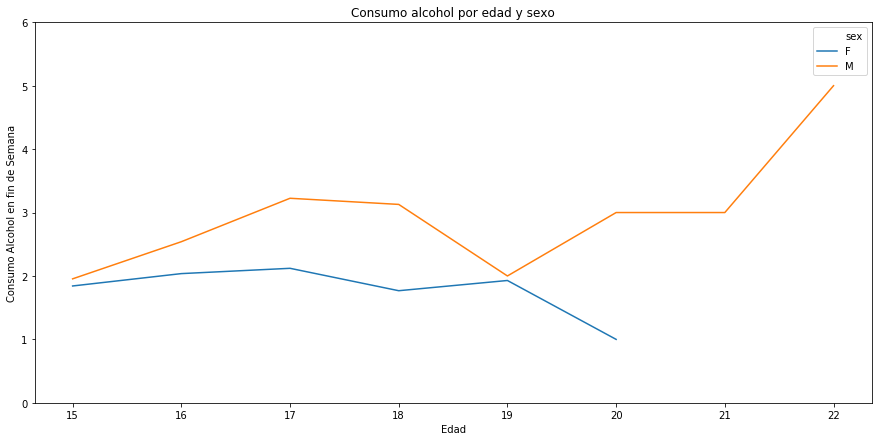

In [301]:
plt.figure(figsize=(15,7)) #Changes the size
sns.lineplot(x='age', y='Walc', data=df, hue='sex', ci=None) #The x is the index, not the name of the column since this is a pivot
plt.ylim([0,6])
plt.title('Consumo alcohol por edad y sexo')
plt.xlabel('Edad')
plt.ylabel('Consumo Alcohol en fin de Semana')

Text(0, 0.5, 'Avg. Score')

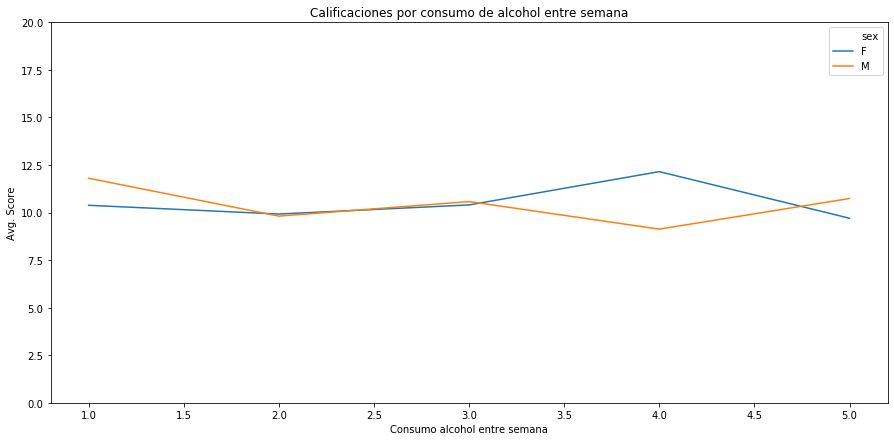

In [304]:
plt.figure(figsize=(15,7)) #Changes the size
sns.lineplot(x='Dalc', y='Avg. Score', data=df, hue='sex', ci=None) #The x is the index, not the name of the column since this is a pivot
plt.ylim([0,20])
plt.title('Calificaciones por consumo de alcohol entre semana')
plt.xlabel('Consumo alcohol entre semana')
plt.ylabel('Avg. Score')

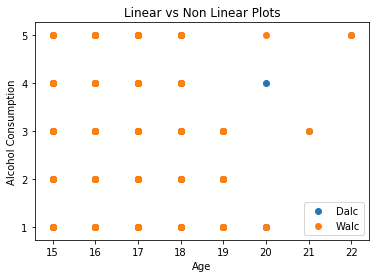

In [105]:
x = list(df['age'])
y = list(df['Dalc'])
z = list(df['Walc'])

plt.scatter(x, y, label="Dalc")
plt.scatter(x, z, label="Walc")

plt.xlabel('Age')
plt.ylabel('Alcohol Consumption')

plt.title("Linear vs Non Linear Plots")
plt.legend()
plt.show()

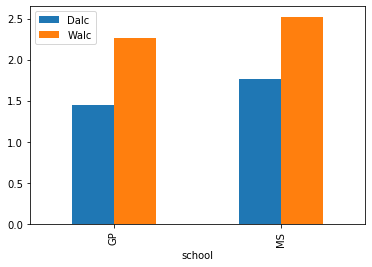

In [114]:
test=df.pivot_table(index=['school'], aggfunc={'Dalc':'mean', 'Walc':'mean'})
test.plot(kind='bar')

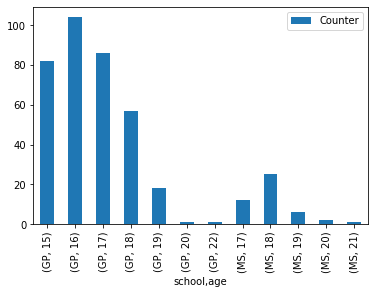

In [91]:
test=df.pivot_table(index=['school','age'], aggfunc={'Counter':'count'})
test.plot(kind='bar')

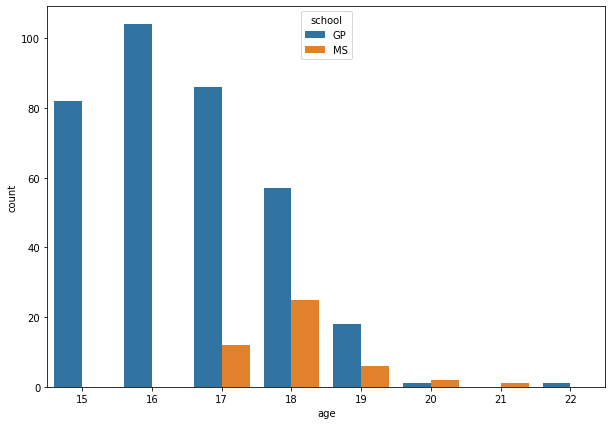

In [219]:
plt.figure(figsize=(10,7))
sns.countplot(x='age', data=df, hue='school')



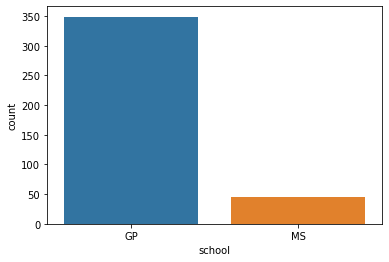

In [220]:
sns.countplot(x='school', data=df)

In [191]:
cor_df=df.corr()
cor_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Avg. Score
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579,-0.134355
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147,0.223854
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457,0.175546
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142,-0.127630
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820,0.134373
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415,-0.375180
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363,0.021435
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307,0.003776
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791,-0.154693
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660,-0.072441


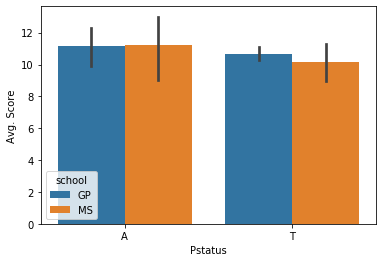

In [198]:
sns.barplot(x='Pstatus', y='Avg. Score', data=df, hue='school')

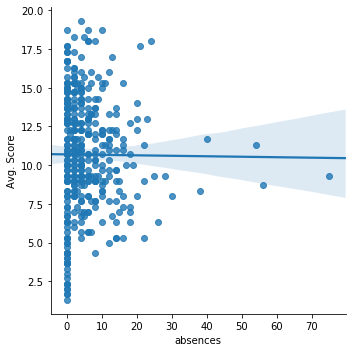

In [103]:
sns.lmplot(x="absences", y="Avg. Score", data=df)

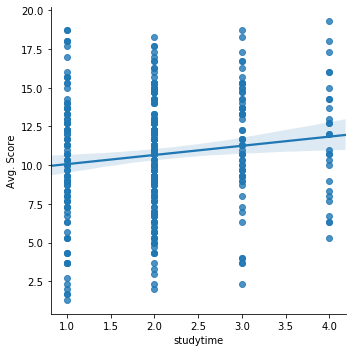

In [107]:
sns.lmplot(x="studytime", y="Avg. Score", data=df)


In [92]:
plt.figure(figsize=(15,7)) #Changes the size
sns.barplot(x=test.index, y='Dalc', data=test) #The x is the index, not the name of the column since this is a pivot
plt.ylim([0,6])
plt.title('Average Steps x Month')
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('Month')
plt.ylabel('Average Steps')

ValueError: Could not interpret input 'Dalc'

<Figure size 1080x504 with 0 Axes>

In [134]:
romantic=df.pivot_table(index=['romantic', 'age'], values = ('Avg. Score'))
romantic

Avg. Score
romantic age            
no       15    11.917460
         16    11.072368
         17    10.813115
         18    10.255319
         19     8.469231
         20    13.350000
         21     8.300000
yes      15     9.189474
         16    10.971429
         17    10.113514
         18     9.968571
         19    10.154545
         20    14.700000
         22     7.300000

Text(0, 0.5, 'Average Score')

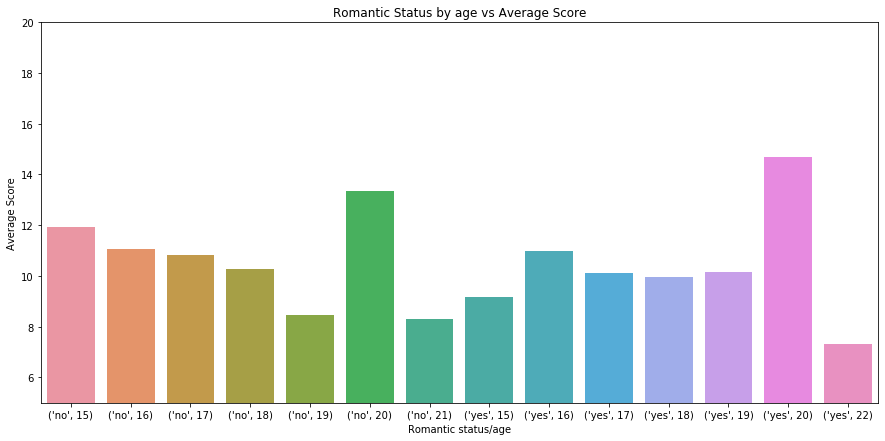

In [139]:
plt.figure(figsize=(15,7)) #Changes the size
sns.barplot(x=romantic.index, y='Avg. Score', data=romantic) 
plt.ylim([5,20])
plt.title('Romantic Status by age vs Average Score')
plt.xlabel('Romantic status/age')
plt.ylabel('Average Score')

In [141]:
higher=df.pivot_table(index=['higher'], values = ('Avg. Score'))
higher

,Avg. Score
higher,
no,7.655000
yes,10.838667


Text(0, 0.5, 'Average Score')

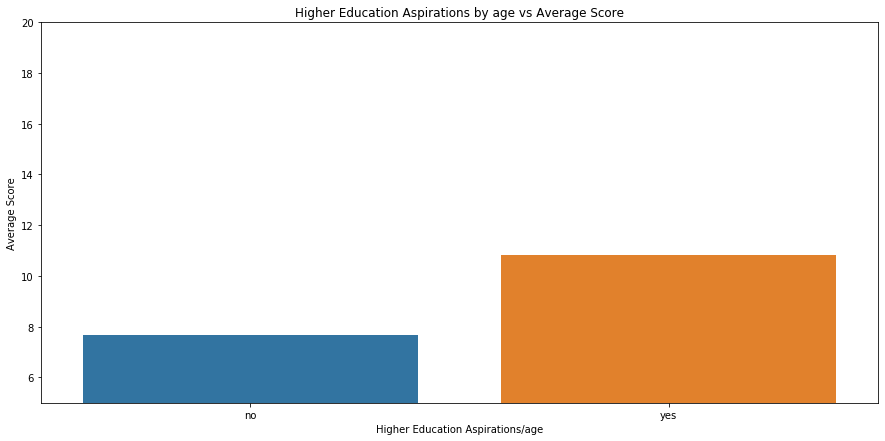

In [142]:
plt.figure(figsize=(15,7))
sns.barplot(x=higher.index, y='Avg. Score', data=higher)
plt.ylim([5,20])
plt.title('Higher Education Aspirations by age vs Average Score')
plt.xlabel('Higher Education Aspirations/age')
plt.ylabel('Average Score')

Text(0.5, 0, 'Interest in attending University')

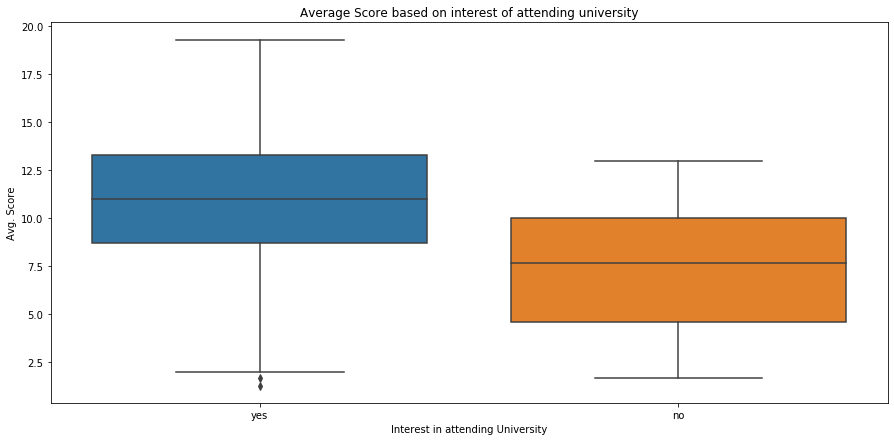

In [295]:
plt.figure(figsize=(15,7))
sns.boxplot(x='higher', y='Avg. Score', data=df)
plt.title('Average Score based on interest of attending university')
plt.xlabel('Interest in attending University')

Text(0, 0.5, 'Average Score')

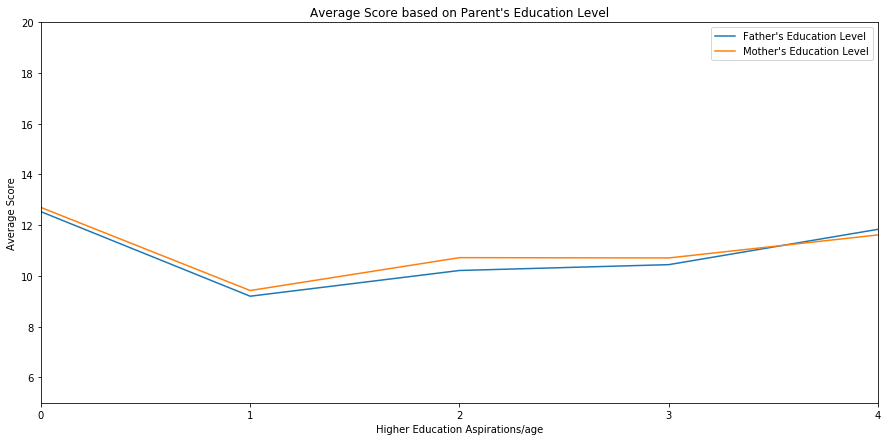

In [289]:
mother=df.pivot_table(index=['Medu'], values = ('Avg. Score'))
father=df.pivot_table(index=['Fedu'], values = ('Avg. Score'))
plt.figure(figsize=(15,7))
sns.lineplot(x=mother.index, y='Avg. Score', data=mother, label="Father's Education Level")
sns.lineplot(x=father.index, y='Avg. Score', data=father, label ="Mother's Education Level")
plt.ylim([5,20])
plt.xlim([0,4])
plt.xticks([0, 1,2, 3, 4])
plt.title("Average Score based on Parent's Education Level")
plt.xlabel('Higher Education Aspirations/age')
plt.ylabel('Average Score')




Text(0, 0.5, 'Average Score')

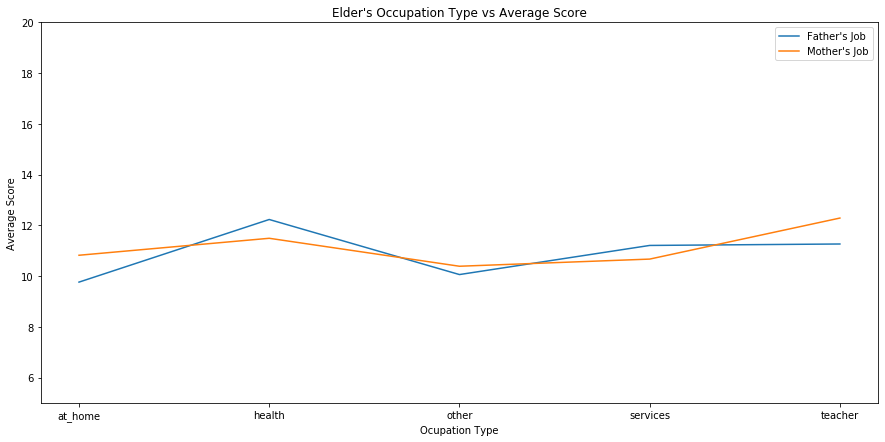

In [155]:
mother=df.pivot_table(index=['Mjob'], values = ('Avg. Score'))
father=df.pivot_table(index=['Fjob'], values = ('Avg. Score'))
plt.figure(figsize=(15,7))
sns.lineplot(x=mother.index, y='Avg. Score', data=mother, label="Father's Job")
plt.ylim([5,20])
plt.title('Higher Education Aspirations by age vs Average Score')
plt.xlabel('Higher Education Aspirations/age')
plt.ylabel('Average Score')

sns.lineplot(x=father.index, y='Avg. Score', data=father, label ="Mother's Job")
plt.ylim([5,20])
plt.title("Elder's Occupation Type vs Average Score")
plt.xlabel('Ocupation Type')
plt.ylabel('Average Score')

Text(0, 0.5, 'Average Score')

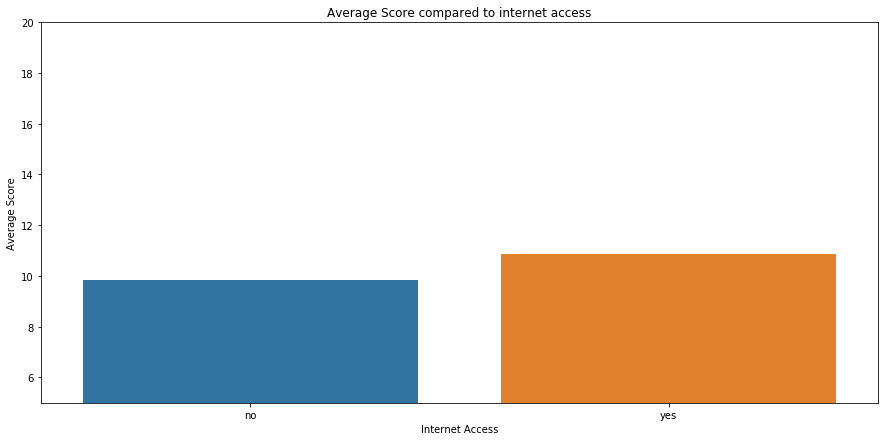

In [159]:
internet=df.pivot_table(index=['internet'], values = ('Avg. Score'))
plt.figure(figsize=(15,7))
sns.barplot(x=internet.index, y='Avg. Score', data=internet)
plt.ylim([5,20])
plt.title('Average Score controlling for internet access')
plt.xlabel('Internet Access')
plt.ylabel('Average Score')


([<matplotlib.axis.XTick at 0x24a5b239978>,
 <a list of 4 Text xticklabel objects>)

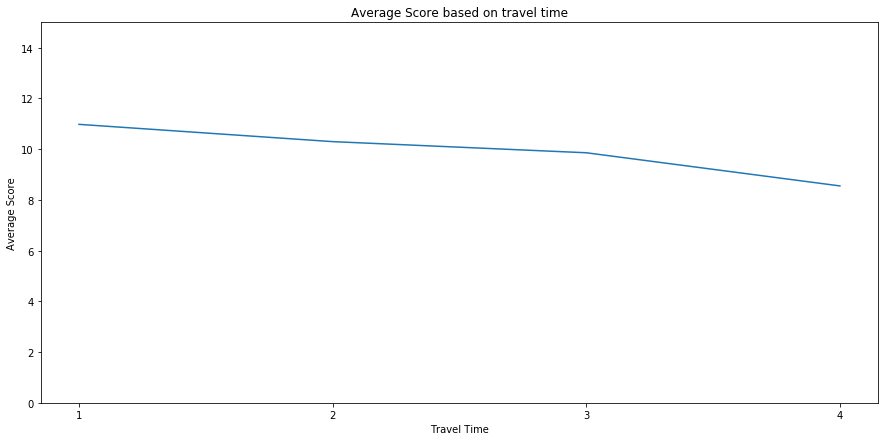

In [306]:
traveltime=df.pivot_table(index=['traveltime'], values = ('Avg. Score'))
plt.figure(figsize=(15,7))
sns.lineplot(x=traveltime.index, y='Avg. Score', data=traveltime)
plt.ylim([0,15])
plt.title('Average Score based on travel time')
plt.xlabel('Travel Time')
plt.ylabel('Average Score')
plt.xticks([1,2,3,4])


Text(0, 0.5, 'Average Score')

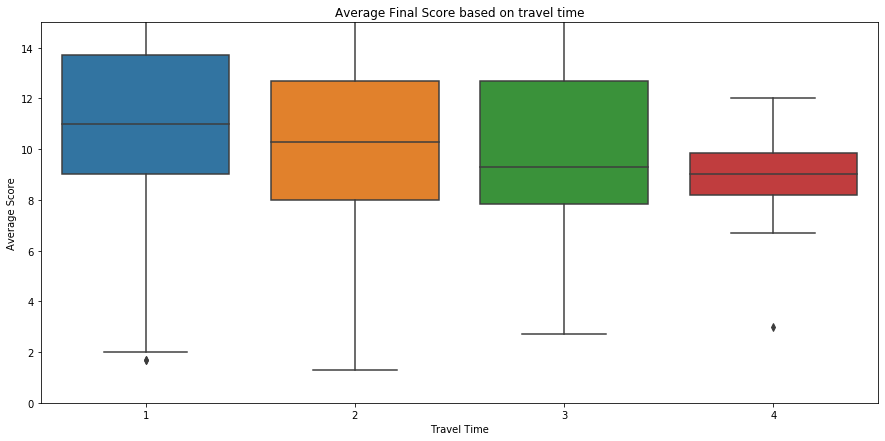

In [307]:
traveltime=df.pivot_table(index=['traveltime'], values = ('Avg. Score'))
plt.figure(figsize=(15,7))
sns.boxplot(x='traveltime', y='Avg. Score', data=df)
plt.ylim([0,15])
plt.title('Average Final Score based on travel time')
plt.xlabel('Travel Time')
plt.ylabel('Average Score')

In [ ]:
traveltime=df.pivot_table(index=['traveltime'], values = ('Avg. Score'))
plt.figure(figsize=(15,7))
sns.barplot(x=traveltime.index, y='Avg. Score', data=traveltime)
plt.ylim([0,15])
plt.title('Average Score based on travel time')
plt.xlabel('Travel Time')
plt.ylabel('Average Score')

Text(0, 0.5, 'Average Score')

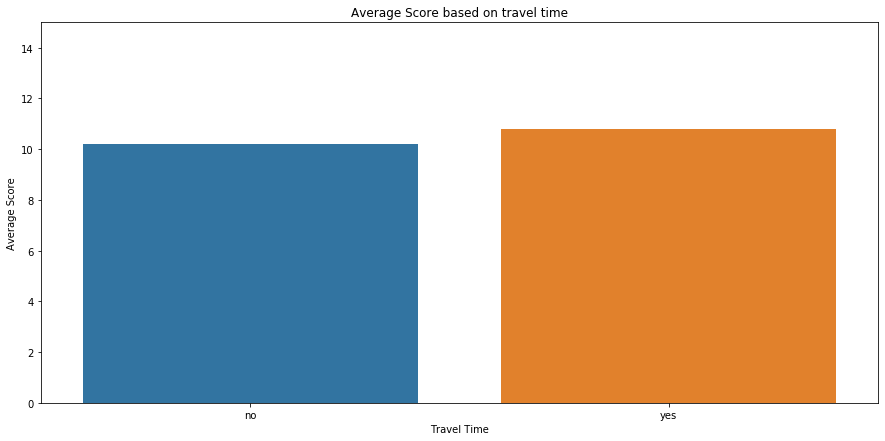

In [164]:
nursery=df.pivot_table(index=['nursery'], values = ('Avg. Score'))
plt.figure(figsize=(15,7))
sns.barplot(x=nursery.index, y='Avg. Score', data=nursery)
plt.ylim([0,15])
plt.title('Average Score based on travel time')
plt.xlabel('Travel Time')
plt.ylabel('Average Score')

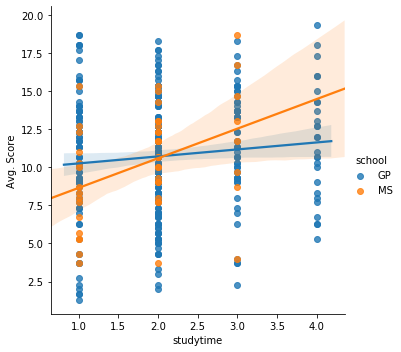

In [168]:
sns.lmplot(x='studytime', y='Avg. Score', data = df, hue='school')

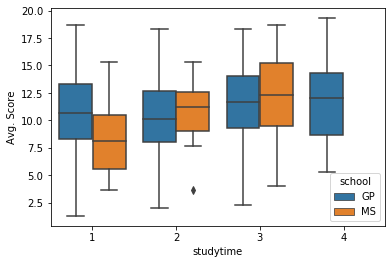

In [266]:
sns.boxplot(x='studytime', y='Avg. Score', data = df, hue='school')
sns.lmplot(x='studytime', y='Avg. Score', data = df, hue='school')

Text(0, 0.5, 'Average Score')

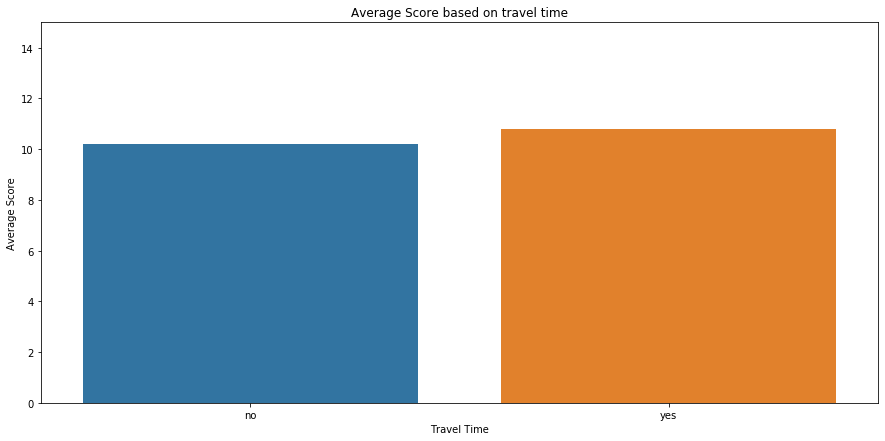

In [169]:
paid=df.pivot_table(index=['nursery'], values = ('Avg. Score'))
plt.figure(figsize=(15,7))
sns.barplot(x=paid.index, y='Avg. Score', data=paid)
plt.ylim([0,15])
plt.title('Average Score based on travel time')
plt.xlabel('Travel Time')
plt.ylabel('Average Score')

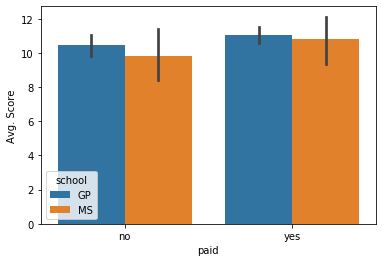

In [199]:
sns.barplot(x='paid', y='Avg. Score', data=df, hue='school')

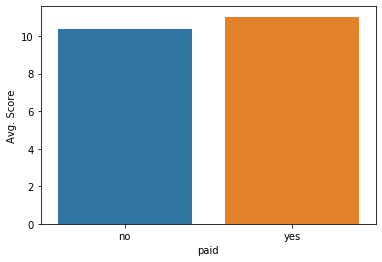

In [175]:
paid=df.pivot_table(index=['paid'], aggfunc={'Avg. Score':'mean'})
sns.barplot(x=paid.index, y='Avg. Score', data=paid)

Text(0.5, 1.0, 'Family Relationship and Average Score')

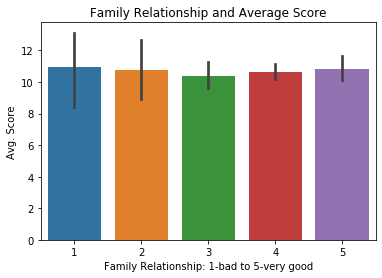

In [180]:
sns.barplot(x='famrel', y='Avg. Score', data=df)
plt.xlabel('Family Relationship: 1-bad to 5-very good')
plt.title('Family Relationship and Average Score')

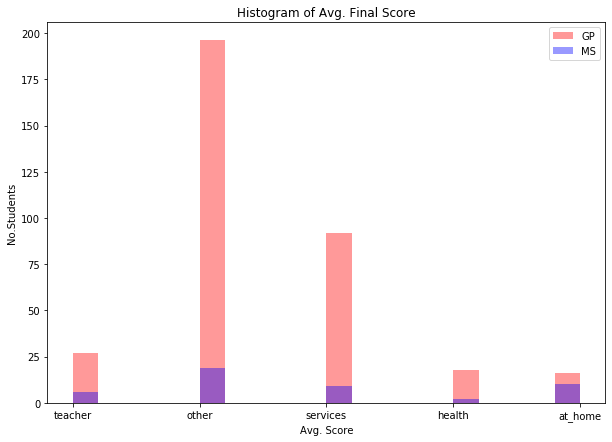

In [185]:
plt.figure(figsize=(10,7)) #Changes the size
sns.distplot(dfGP['Fjob'], kde=False, color='red', bins=20, label = 'GP')
sns.distplot(dfMS['Mjob'], kde=False, color='blue', bins=20, label = 'MS')
plt.title('Histogram of Avg. Final Score')
plt.xlabel('Avg. Score')
plt.ylabel('No.Students')
plt.legend()

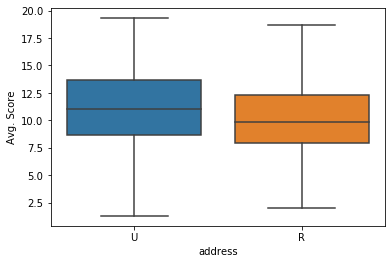

In [308]:
sns.boxplot(x='address', y='Avg. Score', data=df)